<a href="https://colab.research.google.com/github/mariemayadi/ASP_web_app/blob/master/01_practice_NN_tensorflow_regression_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
df = pd.read_csv("/content/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

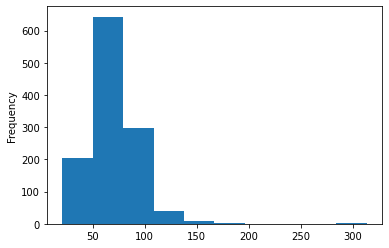

In [5]:
df.LotFrontage.plot(kind='hist')

In [6]:
# Drop geatures with significant null values
# For remaining features, impute those with minimal null values
# One hot encode categorical feature
# Use min/max on numerical feature

## Drop features with significant null values

In [7]:
df.Alley.isnull().sum()

1369

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df.isnull().sum().index

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df.isnull().sum() > (df.shape[0] * 0.80)

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [11]:
df.isnull().sum().index[df.isnull().sum() > (df.shape[0] * 0.80)]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [12]:
high_null_cols = df.isnull().sum().index[df.isnull().sum() > (df.shape[0] * 0.80)].to_list()
high_null_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
high_null_cols.append('MiscVal')

In [14]:
high_null_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']

In [15]:
df.drop(high_null_cols, axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,4,2010,WD,Normal,142125


In [16]:
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

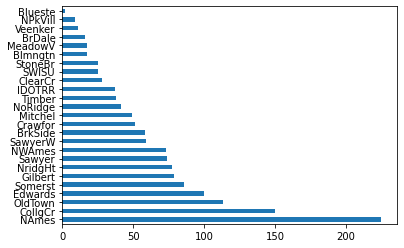

In [17]:
df.Neighborhood.value_counts().plot(kind="barh")

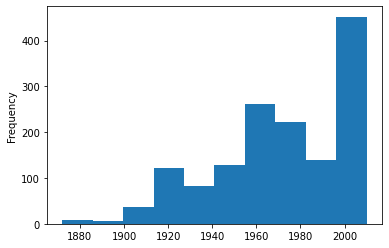

In [18]:
df.YearBuilt.plot(kind="hist")

In [19]:
df = df.drop(high_null_cols, axis=1)

## For remaining features, impute those with minimal null values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [22]:
X.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [23]:
X.PoolArea

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

In [24]:
cat_cols = ['MSSubClass','MSZoning', 'Street','LotShape','LandContour',\
            'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',\
            'Condition2','BldgType','HouseStyle','OverallQual',\
            'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
            'RoofMatl', 'Exterior1st','Exterior2nd','MasVnrType', 'ExterQual',\
            'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',\
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',\
            'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',\
            'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',\
            'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', \
            'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',\
            'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

numeric_cols = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1',\
                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea',\
                'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',\
                'PoolArea']

In [25]:
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [26]:
ct = make_column_transformer((MinMaxScaler(),numeric_cols),
                             (OneHotEncoder(handle_unknown='ignore'), cat_cols))

In [27]:
# Split to train and validation
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=42)

In [28]:
# Fit the column transformer
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['LotFrontage', 'LotArea', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd',
                                  'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                                  'PoolArea']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_...
                                  'LotShape', 'LandContour', 'Utilities',
                                  'LotConfig', 'LandSlope', 'Neighborhood',
                                  'Condition1', 'Condition2', 'BldgType',
                                  'HouseStyle', 'OverallQual', 'OverallCond',
                    

In [29]:
X_train_trans = ct.transform(X_train)
X_val_trans = ct.transform(X_val)

## Creating the NN model

In [30]:
X_train_trans.shape

(1168, 621)

In [31]:
X_train_trans.toarray()

array([[0.16780822, 0.0331861 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.13013699, 0.03055458, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.15753425, 0.03494823, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.13356164, 0.0321204 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.11643836, 0.02964313, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10958904, 0.01114305, 0.09433962, ..., 0.        , 1.        ,
        0.        ]])

In [32]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [33]:
# 1. create model
# model = tf.keras.Sequential([
#             tf.keras.layers.Dense(100),
#             tf.keras.layers.Dense(10),
#             tf.keras.layers.Dense(1)
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

# 2. compile
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.optimizers.SGD(),
              metrics="mse")

# 3. fit
model.fit(X_train_trans.toarray(), y_train, epochs=50)

Epoch 1/50
37/37 [==============================] - 2s 3ms/step - loss: nan - mse: nan
Epoch 2/50
37/37 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 6/50
37/37 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 7/50
37/37 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 8/50
37/37 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 9/50
37/37 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 10/50
37/37 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 11/50
37/37 [==============================] - 0s 3ms/step - loss: nan - mse: nan
Epoch 12/50
37/37 [======================

In [34]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,4,2010,WD,Normal,142125


In [35]:
df[df.isna().sum() > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: ignored

In [ ]:
df.info()

In [36]:
df[df.isna().sum().index[df.isnull().sum() == 0]]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,4,2010,WD,Normal,142125


In [37]:
X_min = df[['MSSubClass','LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',\
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']]
X_min

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea
0,60,8450,7,5,2003,2003,706,706,0,150,856,856,854,1710
1,20,9600,6,8,1976,1976,978,978,0,284,1262,1262,0,1262
2,60,11250,7,5,2001,2002,486,486,0,434,920,920,866,1786
3,70,9550,7,5,1915,1970,216,216,0,540,756,961,756,1717
4,60,14260,8,5,2000,2000,655,655,0,490,1145,1145,1053,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,0,953,953,953,694,1647
1456,20,13175,6,6,1978,1988,790,790,163,589,1542,2073,0,2073
1457,70,9042,7,9,1941,2006,275,275,0,877,1152,1188,1152,2340
1458,20,9717,5,6,1950,1996,49,49,1029,0,1078,1078,0,1078


In [38]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [42]:
# 1. create model
model = tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(1)
])


# 2. compile
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics="mse")

# 3. fit
model.fit(X_min, y, epochs=50)

Epoch 1/50
46/46 [==============================] - 1s 6ms/step - loss: 36306620416.0000 - mse: 36306620416.0000
Epoch 2/50
46/46 [==============================] - 0s 7ms/step - loss: 33308008448.0000 - mse: 33308008448.0000
Epoch 3/50
46/46 [==============================] - 0s 5ms/step - loss: 30071504896.0000 - mse: 30071504896.0000
Epoch 4/50
46/46 [==============================] - 0s 5ms/step - loss: 26486839296.0000 - mse: 26486839296.0000
Epoch 5/50
46/46 [==============================] - 0s 6ms/step - loss: 22751070208.0000 - mse: 22751070208.0000
Epoch 6/50
46/46 [==============================] - 0s 5ms/step - loss: 19278292992.0000 - mse: 19278292992.0000
Epoch 7/50
46/46 [==============================] - 0s 5ms/step - loss: 16426257408.0000 - mse: 16426257408.0000
Epoch 8/50
46/46 [==============================] - 0s 5ms/step - loss: 14353344512.0000 - mse: 14353344512.0000
Epoch 9/50
46/46 [==============================] - 0s 5ms/step - loss: 12911872000.0000 - mse: 

In [ ]:
X.shape

In [45]:
df_best = df[['GrLivArea',
 'GarageCars',
 'MasVnrArea',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'OpenPorchSF',
 'BsmtFinSF1',
 'Fireplaces',
 'LotFrontage',
 'HalfBath',
 'ScreenPorch',
 'YearBuilt',
 'BsmtFullBath',
 'YearRemodAdd',
 'FullBath',
 '2ndFlrSF',
 'TotalBsmtSF',
 'GarageYrBlt',
 'WoodDeckSF',
 'BedroomAbvGr',
 'GarageArea',
 'LotArea',
 'BsmtUnfSF']]
df_best

,GrLivArea,GarageCars,MasVnrArea,TotRmsAbvGrd,1stFlrSF,OpenPorchSF,BsmtFinSF1,Fireplaces,LotFrontage,HalfBath,ScreenPorch,YearBuilt,BsmtFullBath,YearRemodAdd,FullBath,2ndFlrSF,TotalBsmtSF,GarageYrBlt,WoodDeckSF,BedroomAbvGr,GarageArea,LotArea,BsmtUnfSF
0,1710,2,196.0,8,856,61,706,0,65.0,1,0,2003,1,2003,2,854,856,2003.0,0,3,548,8450,150
1,1262,2,0.0,6,1262,0,978,1,80.0,0,0,1976,0,1976,2,0,1262,1976.0,298,3,460,9600,284
2,1786,2,162.0,6,920,42,486,1,68.0,1,0,2001,1,2002,2,866,920,2001.0,0,3,608,11250,434
3,1717,3,0.0,7,961,35,216,1,60.0,0,0,1915,1,1970,1,756,756,1998.0,0,3,642,9550,540
4,2198,3,350.0,9,1145,84,655,1,84.0,1,0,2000,1,2000,2,1053,1145,2000.0,192,4,836,14260,490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,2,0.0,7,953,40,0,1,62.0,1,0,1999,0,2000,2,694,953,1999.0,0,3,460,7917,953
1456,2073,2,119.0,7,2073,0,790,2,85.0,0,0,1978,1,1988,2,0,1542,1978.0,349,3,500,13175,589
1457,2340,1,0.0,9,1188,60,275,2,66.0,0,0,1941,0,2006,2,1152,1152,1941.0,0,4,252,9042,877
1458,1078,1,0.0,5,1078,0,49,0,68.0,0,0,1950,1,1996,1,0,1078,1950.0,366,2,240,9717,0


In [46]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1460 non-null   int64  
 1   GarageCars    1460 non-null   int64  
 2   MasVnrArea    1452 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   OpenPorchSF   1460 non-null   int64  
 6   BsmtFinSF1    1460 non-null   int64  
 7   Fireplaces    1460 non-null   int64  
 8   LotFrontage   1201 non-null   float64
 9   HalfBath      1460 non-null   int64  
 10  ScreenPorch   1460 non-null   int64  
 11  YearBuilt     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  YearRemodAdd  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  2ndFlrSF      1460 non-null   int64  
 16  TotalBsmtSF   1460 non-null   int64  
 17  GarageYrBlt   1379 non-null   float64
 18  WoodDeckSF    1460 non-null 

In [47]:
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(df_best, y, test_size=0.2, random_state=42)

In [49]:
X_train_b

,GrLivArea,GarageCars,MasVnrArea,TotRmsAbvGrd,1stFlrSF,OpenPorchSF,BsmtFinSF1,Fireplaces,LotFrontage,HalfBath,ScreenPorch,YearBuilt,BsmtFullBath,YearRemodAdd,FullBath,2ndFlrSF,TotalBsmtSF,GarageYrBlt,WoodDeckSF,BedroomAbvGr,GarageArea,LotArea,BsmtUnfSF
254,1314,1,0.0,5,1314,0,922,0,70.0,0,0,1957,1,1957,1,0,1314,1957.0,250,3,294,8400,392
1066,1571,2,0.0,7,799,40,0,1,59.0,1,0,1993,0,1994,2,772,799,1993.0,0,3,380,7837,799
638,796,0,0.0,4,796,0,0,0,67.0,0,0,1910,0,1950,1,0,796,NaN,328,2,0,8777,796
799,1768,1,252.0,7,981,0,569,2,60.0,1,0,1937,1,1950,1,787,731,1939.0,0,3,240,7200,162
380,1691,1,0.0,6,1026,0,218,1,50.0,0,0,1924,0,1950,2,665,1026,1924.0,0,3,308,5000,808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1314,2,0.0,6,1314,22,24,1,78.0,0,0,2006,0,2006,2,0,1314,2006.0,0,3,440,9317,1290
1130,1981,2,0.0,7,1328,44,622,2,65.0,0,0,1928,1,1950,2,653,1122,1981.0,431,4,576,7804,500
1294,864,2,0.0,5,864,0,167,0,60.0,0,0,1955,1,1990,1,0,864,1957.0,0,2,572,8172,697
860,1426,1,0.0,7,912,240,0,1,55.0,1,0,1918,0,1998,1,514,912,1925.0,0,3,216,7642,912


In [50]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(X_train_b)

array([[1.314e+03, 1.000e+00, 0.000e+00, ..., 2.940e+02, 8.400e+03,
        3.920e+02],
       [1.571e+03, 2.000e+00, 0.000e+00, ..., 3.800e+02, 7.837e+03,
        7.990e+02],
       [7.960e+02, 0.000e+00, 0.000e+00, ..., 0.000e+00, 8.777e+03,
        7.960e+02],
       ...,
       [8.640e+02, 2.000e+00, 0.000e+00, ..., 5.720e+02, 8.172e+03,
        6.970e+02],
       [1.426e+03, 1.000e+00, 0.000e+00, ..., 2.160e+02, 7.642e+03,
        9.120e+02],
       [1.555e+03, 3.000e+00, 1.300e+02, ..., 6.600e+02, 3.684e+03,
        1.373e+03]])

In [52]:
X_train_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1168 non-null   int64  
 1   GarageCars    1168 non-null   int64  
 2   MasVnrArea    1162 non-null   float64
 3   TotRmsAbvGrd  1168 non-null   int64  
 4   1stFlrSF      1168 non-null   int64  
 5   OpenPorchSF   1168 non-null   int64  
 6   BsmtFinSF1    1168 non-null   int64  
 7   Fireplaces    1168 non-null   int64  
 8   LotFrontage   951 non-null    float64
 9   HalfBath      1168 non-null   int64  
 10  ScreenPorch   1168 non-null   int64  
 11  YearBuilt     1168 non-null   int64  
 12  BsmtFullBath  1168 non-null   int64  
 13  YearRemodAdd  1168 non-null   int64  
 14  FullBath      1168 non-null   int64  
 15  2ndFlrSF      1168 non-null   int64  
 16  TotalBsmtSF   1168 non-null   int64  
 17  GarageYrBlt   1104 non-null   float64
 18  WoodDeckSF    1168 non-nul

In [51]:
pd.DataFrame(imputer.fit_transform(X_train_b)).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1168 non-null   float64
 1   1       1168 non-null   float64
 2   2       1168 non-null   float64
 3   3       1168 non-null   float64
 4   4       1168 non-null   float64
 5   5       1168 non-null   float64
 6   6       1168 non-null   float64
 7   7       1168 non-null   float64
 8   8       1168 non-null   float64
 9   9       1168 non-null   float64
 10  10      1168 non-null   float64
 11  11      1168 non-null   float64
 12  12      1168 non-null   float64
 13  13      1168 non-null   float64
 14  14      1168 non-null   float64
 15  15      1168 non-null   float64
 16  16      1168 non-null   float64
 17  17      1168 non-null   float64
 18  18      1168 non-null   float64
 19  19      1168 non-null   float64
 20  20      1168 non-null   float64
 21  21      1168 non-null   float64
 22  

In [ ]:
>>> imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
>>> imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
SimpleImputer()
>>> X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
>>> print(imp_mean.transform(X))

In [53]:
# 1. create model
model = tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(1)
])


# 2. compile
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics="mse")

# 3. fit
#model.fit(X_train_b, y_train_b, epochs=50)
model.fit(pd.DataFrame(imputer.fit_transform(X_train_b)), y_train_b, epochs=50)

Epoch 1/50
37/37 [==============================] - 1s 5ms/step - loss: 37158539264.0000 - mse: 37158539264.0000
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 34635300864.0000 - mse: 34635300864.0000
Epoch 3/50
37/37 [==============================] - 0s 5ms/step - loss: 32075233280.0000 - mse: 32075233280.0000
Epoch 4/50
37/37 [==============================] - 0s 6ms/step - loss: 29328449536.0000 - mse: 29328449536.0000
Epoch 5/50
37/37 [==============================] - 0s 6ms/step - loss: 26416404480.0000 - mse: 26416404480.0000
Epoch 6/50
37/37 [==============================] - 0s 6ms/step - loss: 23396202496.0000 - mse: 23396202496.0000
Epoch 7/50
37/37 [==============================] - 0s 5ms/step - loss: 20465471488.0000 - mse: 20465471488.0000
Epoch 8/50
37/37 [==============================] - 0s 5ms/step - loss: 17941960704.0000 - mse: 17941960704.0000
Epoch 9/50
37/37 [==============================] - 0s 6ms/step - loss: 15810676736.0000 - mse: 

In [60]:
import pandas as pd

In [61]:
train = pd.read_csv('/content/train.csv')
print(train.shape)
test = pd.read_csv('/content/test.csv')
print(test.shape)
train.head()

(1460, 81)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
train.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [63]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

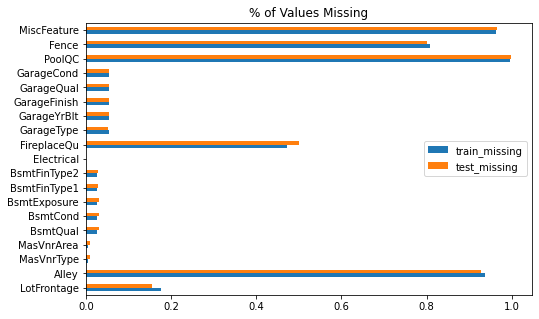

In [65]:
ncounts = pd.DataFrame([train.isna().mean(), test.isna().mean()]).T
ncounts = ncounts.rename(columns={0: 'train_missing', 1:'test_missing'})

ncounts.query('train_missing > 0').plot(
    kind="barh", figsize=(8,5), title= "% of Values Missing"
)

In [66]:
nacols = train.isna().sum().index[train.isna().sum() > 0].to_list()
nacols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [67]:
# For each row/example the count of null values
train.isna().sum(axis=1)

0       5
1       4
2       4
3       4
4       4
       ..
1455    4
1456    3
1457    2
1458    5
1459    5
Length: 1460, dtype: int64

In [68]:
train['n_missing'] = test[nacols].isna().sum(axis=1)

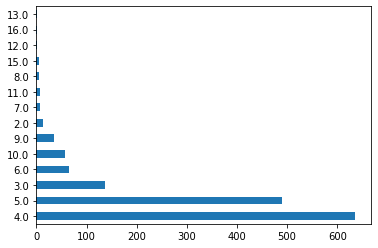

In [69]:
train['n_missing'].value_counts().plot(
    kind='barh'
)

## Create tag columns with missing indicators

In [70]:
train_missing_tag_df = train[nacols].isna()
train_missing_tag_df.columns =\
[f"{c}_missing" for c in train_missing_tag_df.columns]

In [71]:
train_missing_tag_df

,LotFrontage_missing,Alley_missing,MasVnrType_missing,MasVnrArea_missing,BsmtQual_missing,BsmtCond_missing,BsmtExposure_missing,BsmtFinType1_missing,BsmtFinType2_missing,Electrical_missing,FireplaceQu_missing,GarageType_missing,GarageYrBlt_missing,GarageFinish_missing,GarageQual_missing,GarageCond_missing,PoolQC_missing,Fence_missing,MiscFeature_missing
0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1456,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1457,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1458,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True


In [72]:
train = pd.concat([train, train_missing_tag_df], axis=1)

In [73]:
train.head()
# so that when imputing later, we have a record for whether the column used to be NaN

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,n_missing,LotFrontage_missing,Alley_missing,MasVnrType_missing,MasVnrArea_missing,BsmtQual_missing,BsmtCond_missing,BsmtExposure_missing,BsmtFinType1_missing,BsmtFinType2_missing,Electrical_missing,FireplaceQu_missing,GarageType_missing,GarageYrBlt_missing,GarageFinish_missing,GarageQual_missing,GarageCond_missing,PoolQC_missing,Fence_missing,MiscFeature_missing
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,4.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,4.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,4.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,5.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


In [74]:
train_missing_tag_df.columns.to_list()

['LotFrontage_missing',
 'Alley_missing',
 'MasVnrType_missing',
 'MasVnrArea_missing',
 'BsmtQual_missing',
 'BsmtCond_missing',
 'BsmtExposure_missing',
 'BsmtFinType1_missing',
 'BsmtFinType2_missing',
 'Electrical_missing',
 'FireplaceQu_missing',
 'GarageType_missing',
 'GarageYrBlt_missing',
 'GarageFinish_missing',
 'GarageQual_missing',
 'GarageCond_missing',
 'PoolQC_missing',
 'Fence_missing',
 'MiscFeature_missing']

In [75]:
train_missing_tag_df.shape

(1460, 19)

In [76]:
train['SalePrice'].shape

(1460,)

In [77]:
# Could use 
# Tree Bosst models (eg. LightGBM, XGBoost) can deal with missing values on their own without  filling them in

In [78]:
# VS
# Neural Networks will not work with null values

In [79]:
# Dropping columns
# train.dropna(axis=1)

# Dropping rows
# train.dropna(axis=0)

### Imputing with Sklearn
Note: `add_indicator` will add the indicator column

In [80]:
from sklearn.impute import SimpleImputer

train = pd.read_csv("/content/train.csv")
imputer = SimpleImputer(strategy="most_frequent", add_indicator=False)

In [81]:
FEATURES = train.columns.to_list()

In [82]:
# impute only from the training data
# only 'transform' on validation or test data
tr_imputer = imputer.fit_transform(train[FEATURES])

In [214]:
test['SalePrice'] = 0

In [215]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,...,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,...,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,...,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam

In [216]:
test_imputer = imputer.transform(test[FEATURES])

In [83]:
tr_imputer

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [217]:
test_imputer

array([[1461, 20, 'RH', ..., 'WD', 'Normal', 0],
       [1462, 20, 'RL', ..., 'WD', 'Normal', 0],
       [1463, 60, 'RL', ..., 'WD', 'Normal', 0],
       ...,
       [2917, 20, 'RL', ..., 'WD', 'Abnorml', 0],
       [2918, 85, 'RL', ..., 'WD', 'Normal', 0],
       [2919, 60, 'RL', ..., 'WD', 'Normal', 0]], dtype=object)

In [84]:
pd.DataFrame(tr_imputer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
0,1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,1950,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [85]:
len(FEATURES)

81

In [86]:
train_imp = pd.DataFrame(tr_imputer, columns=FEATURES)
train_imp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0

In [87]:
train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   object
 1   MSSubClass     1460 non-null   object
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   object
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   object
 18  OverallCond    1460 non-null

In [219]:
test_imp = pd.DataFrame(test_imputer, columns=FEATURES)
test_imp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80,11622,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,...,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,Gd,MnPrv,Shed,0,6,2010,WD,Normal,0
1,1462,20,RL,81,14267,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,...,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,Gd,MnPrv,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74,13830,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,...,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,Gd,MnPrv,Shed,0,3,2010,WD,Normal,0
3,1464,60,RL,78,9978,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,...,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,Gd,MnPrv,Shed,0,6,2010,WD,Normal,0
4,1465,120,RL,43,5005,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,...,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,Gd,MnPrv,Shed,0,1,2010,WD,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21,1936,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,...,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,Gd,Attchd,2005,Unf,0,0,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,6,2006,WD,Normal,0
1455,2916,160,RM,21,1894,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0,TA,TA,CBlock,TA,TA,No,Rec,252,Unf,0,294,546,GasA,...,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,6,Typ,0,Gd,CarPort,1970,Unf,1,286,TA,TA,Y,0,24,0,0,0,0,Gd,MnPrv,Shed,0,4,2006,WD,Abnorml,0
1456,2917,20,RL,160,20000,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,ALQ,1224,Unf,0,0,1224,GasA,...,Y,SBrkr,1224,0,0,1224,1,0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960,Unf,2,576,TA,TA,Y,474,0,0,0,0,0,Gd,MnPrv,Shed,0,9,2006,WD,Abnorml,0
1457,2918,85,RL,62,10441,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0,TA,TA,PConc,Gd,TA,Av,GLQ,337,Unf,0,575,912,GasA,...,Y,SBrkr,970,0,0,970,0,1,1,0,3,1,TA,6,Typ,0,Gd,At

In [220]:
test_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   object
 1   MSSubClass     1459 non-null   object
 2   MSZoning       1459 non-null   object
 3   LotFrontage    1459 non-null   object
 4   LotArea        1459 non-null   object
 5   Street         1459 non-null   object
 6   Alley          1459 non-null   object
 7   LotShape       1459 non-null   object
 8   LandContour    1459 non-null   object
 9   Utilities      1459 non-null   object
 10  LotConfig      1459 non-null   object
 11  LandSlope      1459 non-null   object
 12  Neighborhood   1459 non-null   object
 13  Condition1     1459 non-null   object
 14  Condition2     1459 non-null   object
 15  BldgType       1459 non-null   object
 16  HouseStyle     1459 non-null   object
 17  OverallQual    1459 non-null   object
 18  OverallCond    1459 non-null

## Modeling (post sklearn imputing)

In [88]:
import tensorflow as tf

In [89]:
print(tf.__version__)

2.7.0


In [92]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [209]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [90]:
print(train_imp.shape)


(1460, 81)


In [106]:
train_imp.shape

(1460, 81)

In [107]:
train.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [114]:
tr_imputer

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [116]:
cat_cols = ['MSSubClass','MSZoning', 'Street','LotShape','LandContour',\
            'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',\
            'Condition2','BldgType','HouseStyle','OverallQual',\
            'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
            'RoofMatl', 'Exterior1st','Exterior2nd','MasVnrType', 'ExterQual',\
            'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',\
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',\
            'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',\
            'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',\
            'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', \
            'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',\
            'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(cat_cols))

numeric_cols = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1',\
                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea',\
                'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',\
                'PoolArea']
print(len(numeric_cols))
print(len(cat_cols) + len(numeric_cols))

55
19
74


In [120]:
train[nacols]

,Alley,PoolQC,Fence,MiscFeature,MiscVal
0,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,0
1456,NaN,NaN,MnPrv,NaN,0
1457,NaN,NaN,GdPrv,Shed,2500
1458,NaN,NaN,NaN,NaN,0


In [119]:
nacols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal']
print(len(nacols))

5


In [117]:
train_imp.shape

(1460, 81)

In [221]:
test_imp.shape

(1459, 81)

In [122]:
# Drop NA columns
train_imp = train_imp.drop(nacols, axis=1)

In [223]:
test_imp = test_imp.drop(nacols, axis=1)

In [127]:
# Drop target column
train_imp = train_imp.drop(columns=['SalePrice'], axis=1)

In [225]:
test_imp = test_imp.drop(columns=['SalePrice'], axis=1)

In [130]:
train_imp[cat_cols].head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,Typ,0,Gd,Attchd,2003,RFn,2,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976,RFn,2,TA,TA,Y,5,2007,WD,Normal


In [131]:
train_imp[numeric_cols].head(2)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,65,8450,196,706,0,150,856,856,854,0,1710,8,548,0,61,0,0,0,0
1,80,9600,0,978,0,284,1262,1262,0,0,1262,6,460,298,0,0,0,0,0


In [143]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(),numeric_cols),
    (OneHotEncoder(handle_unknown='ignore'),cat_cols)
)

X_train, X_test, y_train, y_test = train_test_split(train_imp,\
                  train.SalePrice, test_size=0.2, random_state=42)


X_train_trans = ct.fit_transform(X_train)
X_test_trans = ct.transform(X_test)

In [226]:
X_test_test_trans = ct.transform(test_imp)

In [228]:
X_test_test_trans

<1459x608 sparse matrix of type '<class 'numpy.float64'>'
	with 95912 stored elements in Compressed Sparse Row format>

In [148]:
X_train_trans.shape

(1168, 608)

In [227]:
X_test_test_trans.shape

(1459, 608)

In [169]:
scipy.sparse.csc_matrix.todense(X_train_trans)

matrix([[0.16780822, 0.0331861 , 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.13013699, 0.03055458, 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.15753425, 0.03494823, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.13356164, 0.0321204 , 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.11643836, 0.02964313, 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.10958904, 0.01114305, 0.09433962, ..., 0.        , 1.        ,
         0.        ]])

In [229]:
foo_test_test = np.array(scipy.sparse.csc_matrix.todense(X_test_test_trans))

In [170]:
foo = np.array(scipy.sparse.csc_matrix.todense(X_train_trans))

In [171]:
foo

array([[0.16780822, 0.0331861 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.13013699, 0.03055458, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.15753425, 0.03494823, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.13356164, 0.0321204 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.11643836, 0.02964313, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10958904, 0.01114305, 0.09433962, ..., 0.        , 1.        ,
        0.        ]])

In [183]:
foo_test = foo = np.array(scipy.sparse.csc_matrix.todense(X_test_trans))

In [181]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
# 1. create the model
model = tf.keras.Sequential([
            #tf.keras.layers.Input(shape=(X_train_trans.shape[1],), sparse=True),
            #tf.keras.layers.Dense(100),
            #tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
])

# 2. compile
model.compile(loss=tf.keras.losses.mse,
              optimizer= tf.optimizers.SGD(),
              metrics='mse')

# 3 fit
history = model.fit(foo,\
                    y_train, epochs=5000,callbacks=[callback])

Epoch 1/5000
37/37 [==============================] - 1s 4ms/step - loss: 4495651328.0000 - mse: 4495651328.0000
Epoch 2/5000
37/37 [==============================] - 0s 4ms/step - loss: 2066849408.0000 - mse: 2066849408.0000
Epoch 3/5000
37/37 [==============================] - 0s 4ms/step - loss: 1622063104.0000 - mse: 1622063104.0000
Epoch 4/5000
37/37 [==============================] - 0s 4ms/step - loss: 1370928128.0000 - mse: 1370928128.0000
Epoch 5/5000
37/37 [==============================] - 0s 3ms/step - loss: 1232977280.0000 - mse: 1232977280.0000
Epoch 6/5000
37/37 [==============================] - 0s 4ms/step - loss: 1153421440.0000 - mse: 1153421440.0000
Epoch 7/5000
37/37 [==============================] - 0s 4ms/step - loss: 1074859648.0000 - mse: 1074859648.0000
Epoch 8/5000
37/37 [==============================] - 0s 4ms/step - loss: 1022310656.0000 - mse: 1022310656.0000
Epoch 9/5000
37/37 [==============================] - 0s 4ms/step - loss: 983777408.0000 - mse: 

In [182]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
# 1. create the model
model = tf.keras.Sequential([
            #tf.keras.layers.Input(shape=(X_train_trans.shape[1],), sparse=True),
            #tf.keras.layers.Dense(100),
            #tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
])

# 2. compile
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.optimizers.SGD(),
              metrics='mae')

# 3 fit
history = model.fit(foo,\
                    y_train, epochs=5000,callbacks=[callback])

Streaming output truncated to the last 5000 lines.
37/37 [==============================] - 0s 3ms/step - loss: 151553.7188 - mae: 151553.7188
Epoch 2502/5000
37/37 [==============================] - 0s 3ms/step - loss: 151541.7500 - mae: 151541.7500
Epoch 2503/5000
37/37 [==============================] - 0s 3ms/step - loss: 151529.8125 - mae: 151529.8125
Epoch 2504/5000
37/37 [==============================] - 0s 3ms/step - loss: 151517.8594 - mae: 151517.8594
Epoch 2505/5000
37/37 [==============================] - 0s 3ms/step - loss: 151505.9219 - mae: 151505.9219
Epoch 2506/5000
37/37 [==============================] - 0s 3ms/step - loss: 151493.9375 - mae: 151493.9375
Epoch 2507/5000
37/37 [==============================] - 0s 4ms/step - loss: 151482.0156 - mae: 151482.0156
Epoch 2508/5000
37/37 [==============================] - 0s 3ms/step - loss: 151470.0156 - mae: 151470.0156
Epoch 2509/5000
37/37 [==============================] - 0s 3ms/step - loss: 151458.0781 - mae: 15145

In [184]:
model.evaluate(foo_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 119305.1953 - mae: 119305.1953


[119305.1953125, 119305.1953125]

In [187]:
type(history.history)

dict

In [188]:
history.history

{'loss': [181436.015625,
  181424.046875,
  181412.078125,
  181400.125,
  181388.1875,
  181376.203125,
  181364.28125,
  181352.34375,
  181340.359375,
  181328.421875,
  181316.5,
  181304.5,
  181292.546875,
  181280.609375,
  181268.6875,
  181256.703125,
  181244.71875,
  181232.828125,
  181220.84375,
  181208.90625,
  181196.9375,
  181184.96875,
  181173.046875,
  181161.0625,
  181149.109375,
  181137.171875,
  181125.234375,
  181113.28125,
  181101.328125,
  181089.34375,
  181077.4375,
  181065.46875,
  181053.5,
  181041.5625,
  181029.640625,
  181017.65625,
  181005.71875,
  180993.78125,
  180981.828125,
  180969.859375,
  180957.890625,
  180946.0,
  180934.03125,
  180922.046875,
  180910.140625,
  180898.171875,
  180886.203125,
  180874.25,
  180862.296875,
  180850.390625,
  180838.390625,
  180826.4375,
  180814.46875,
  180802.5625,
  180790.59375,
  180778.65625,
  180766.703125,
  180754.703125,
  180742.8125,
  180730.84375,
  180718.890625,
  180706.921875,


In [190]:
history.history

dict_keys(['loss', 'mae'])

In [191]:
history.history.values()

dict_values([[181436.015625, 181424.046875, 181412.078125, 181400.125, 181388.1875, 181376.203125, 181364.28125, 181352.34375, 181340.359375, 181328.421875, 181316.5, 181304.5, 181292.546875, 181280.609375, 181268.6875, 181256.703125, 181244.71875, 181232.828125, 181220.84375, 181208.90625, 181196.9375, 181184.96875, 181173.046875, 181161.0625, 181149.109375, 181137.171875, 181125.234375, 181113.28125, 181101.328125, 181089.34375, 181077.4375, 181065.46875, 181053.5, 181041.5625, 181029.640625, 181017.65625, 181005.71875, 180993.78125, 180981.828125, 180969.859375, 180957.890625, 180946.0, 180934.03125, 180922.046875, 180910.140625, 180898.171875, 180886.203125, 180874.25, 180862.296875, 180850.390625, 180838.390625, 180826.4375, 180814.46875, 180802.5625, 180790.59375, 180778.65625, 180766.703125, 180754.703125, 180742.8125, 180730.84375, 180718.890625, 180706.921875, 180694.984375, 180683.046875, 180671.078125, 180659.125, 180647.1875, 180635.21875, 180623.296875, 180611.359375, 1805

In [192]:
pd.DataFrame(history.history)

,loss,mae
0,181436.015625,181436.015625
1,181424.046875,181424.046875
2,181412.078125,181412.078125
3,181400.125000,181400.125000
4,181388.187500,181388.187500
...,...,...
4995,121935.414062,121935.414062
4996,121923.640625,121923.640625
4997,121911.875000,121911.875000
4998,121900.093750,121900.093750


Text(0, 0.5, 'loss')

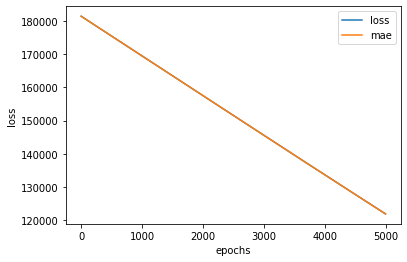

In [194]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [198]:
foo

array([[0.16780822, 0.03325154, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26369863, 0.05120942, 0.26269956, ..., 0.        , 1.        ,
        0.        ],
       [0.11986301, 0.03580359, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14383562, 0.03224661, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.13356164, 0.03638318, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16780822, 0.03187735, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [199]:
foo.shape

(292, 608)

In [200]:
foo = np.array(scipy.sparse.csc_matrix.todense(X_train_trans))
foo.shape

(1168, 608)

In [205]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
# 1. create the model
model = tf.keras.Sequential([
            #tf.keras.layers.Input(shape=(X_train_trans.shape[1],), sparse=True),
            #tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(1)
])

# 2. compile
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.optimizers.SGD(learning_rate=0.0001),
              metrics='mae')

# 3 fit
history = model.fit(foo,y_train, epochs=5000,callbacks=[callback])

Streaming output truncated to the last 5000 lines.
37/37 [==============================] - 0s 3ms/step - loss: 16264.0840 - mae: 16264.0840
Epoch 2299/5000
37/37 [==============================] - 0s 3ms/step - loss: 16254.8662 - mae: 16254.8662
Epoch 2300/5000
37/37 [==============================] - 0s 3ms/step - loss: 16252.5723 - mae: 16252.5723
Epoch 2301/5000
37/37 [==============================] - 0s 4ms/step - loss: 16252.2480 - mae: 16252.2480
Epoch 2302/5000
37/37 [==============================] - 0s 3ms/step - loss: 16249.8994 - mae: 16249.8994
Epoch 2303/5000
37/37 [==============================] - 0s 3ms/step - loss: 16246.3936 - mae: 16246.3936
Epoch 2304/5000
37/37 [==============================] - 0s 3ms/step - loss: 16243.4131 - mae: 16243.4131
Epoch 2305/5000
37/37 [==============================] - 0s 3ms/step - loss: 16244.6914 - mae: 16244.6914
Epoch 2306/5000
37/37 [==============================] - 0s 3ms/step - loss: 16241.1699 - mae: 16241.1699
Epoch 2307/

In [206]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [207]:
foo_test.shape

(292, 608)

In [208]:
test.shape

(1459, 80)

In [ ]:
foo_test_test = foo = np.array(scipy.sparse.csc_matrix.todense(X_test_trans))

In [231]:
model.predict(foo_test_test).shape

(1459, 1)

In [235]:
model.predict(foo_test_test)

array([[116880.9 ],
       [152233.62],
       [181787.27],
       ...,
       [170667.64],
       [108665.74],
       [225882.23]], dtype=float32)

In [238]:
output = test[['Id']]
output

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [239]:
output['SalePrice'] = model.predict(foo_test_test)
output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,SalePrice
0,1461,116880.898438
1,1462,152233.625000
2,1463,181787.265625
3,1464,185128.000000
4,1465,196756.031250
...,...,...
1454,2915,76574.515625
1455,2916,77908.726562
1456,2917,170667.640625
1457,2918,108665.742188


In [240]:
output.to_csv('submission_v01_2022-01-28.csv', index=False)